## 합성곱 신경망을 활용한 이미지 분류

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [2]:
(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

In [3]:
train_input.shape

(60000, 28, 28)

In [4]:
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

In [5]:
train_scaled.shape

(48000, 28, 28, 1)

In [6]:
print(train_scaled.shape, val_scaled.shape)

(48000, 28, 28, 1) (12000, 28, 28, 1)


In [7]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (28, 28, 1)))

c:\Users\cw3714\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.add(keras.layers.MaxPooling2D(2))

In [9]:
model.add(keras.layers.Conv2D(64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2))

In [10]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

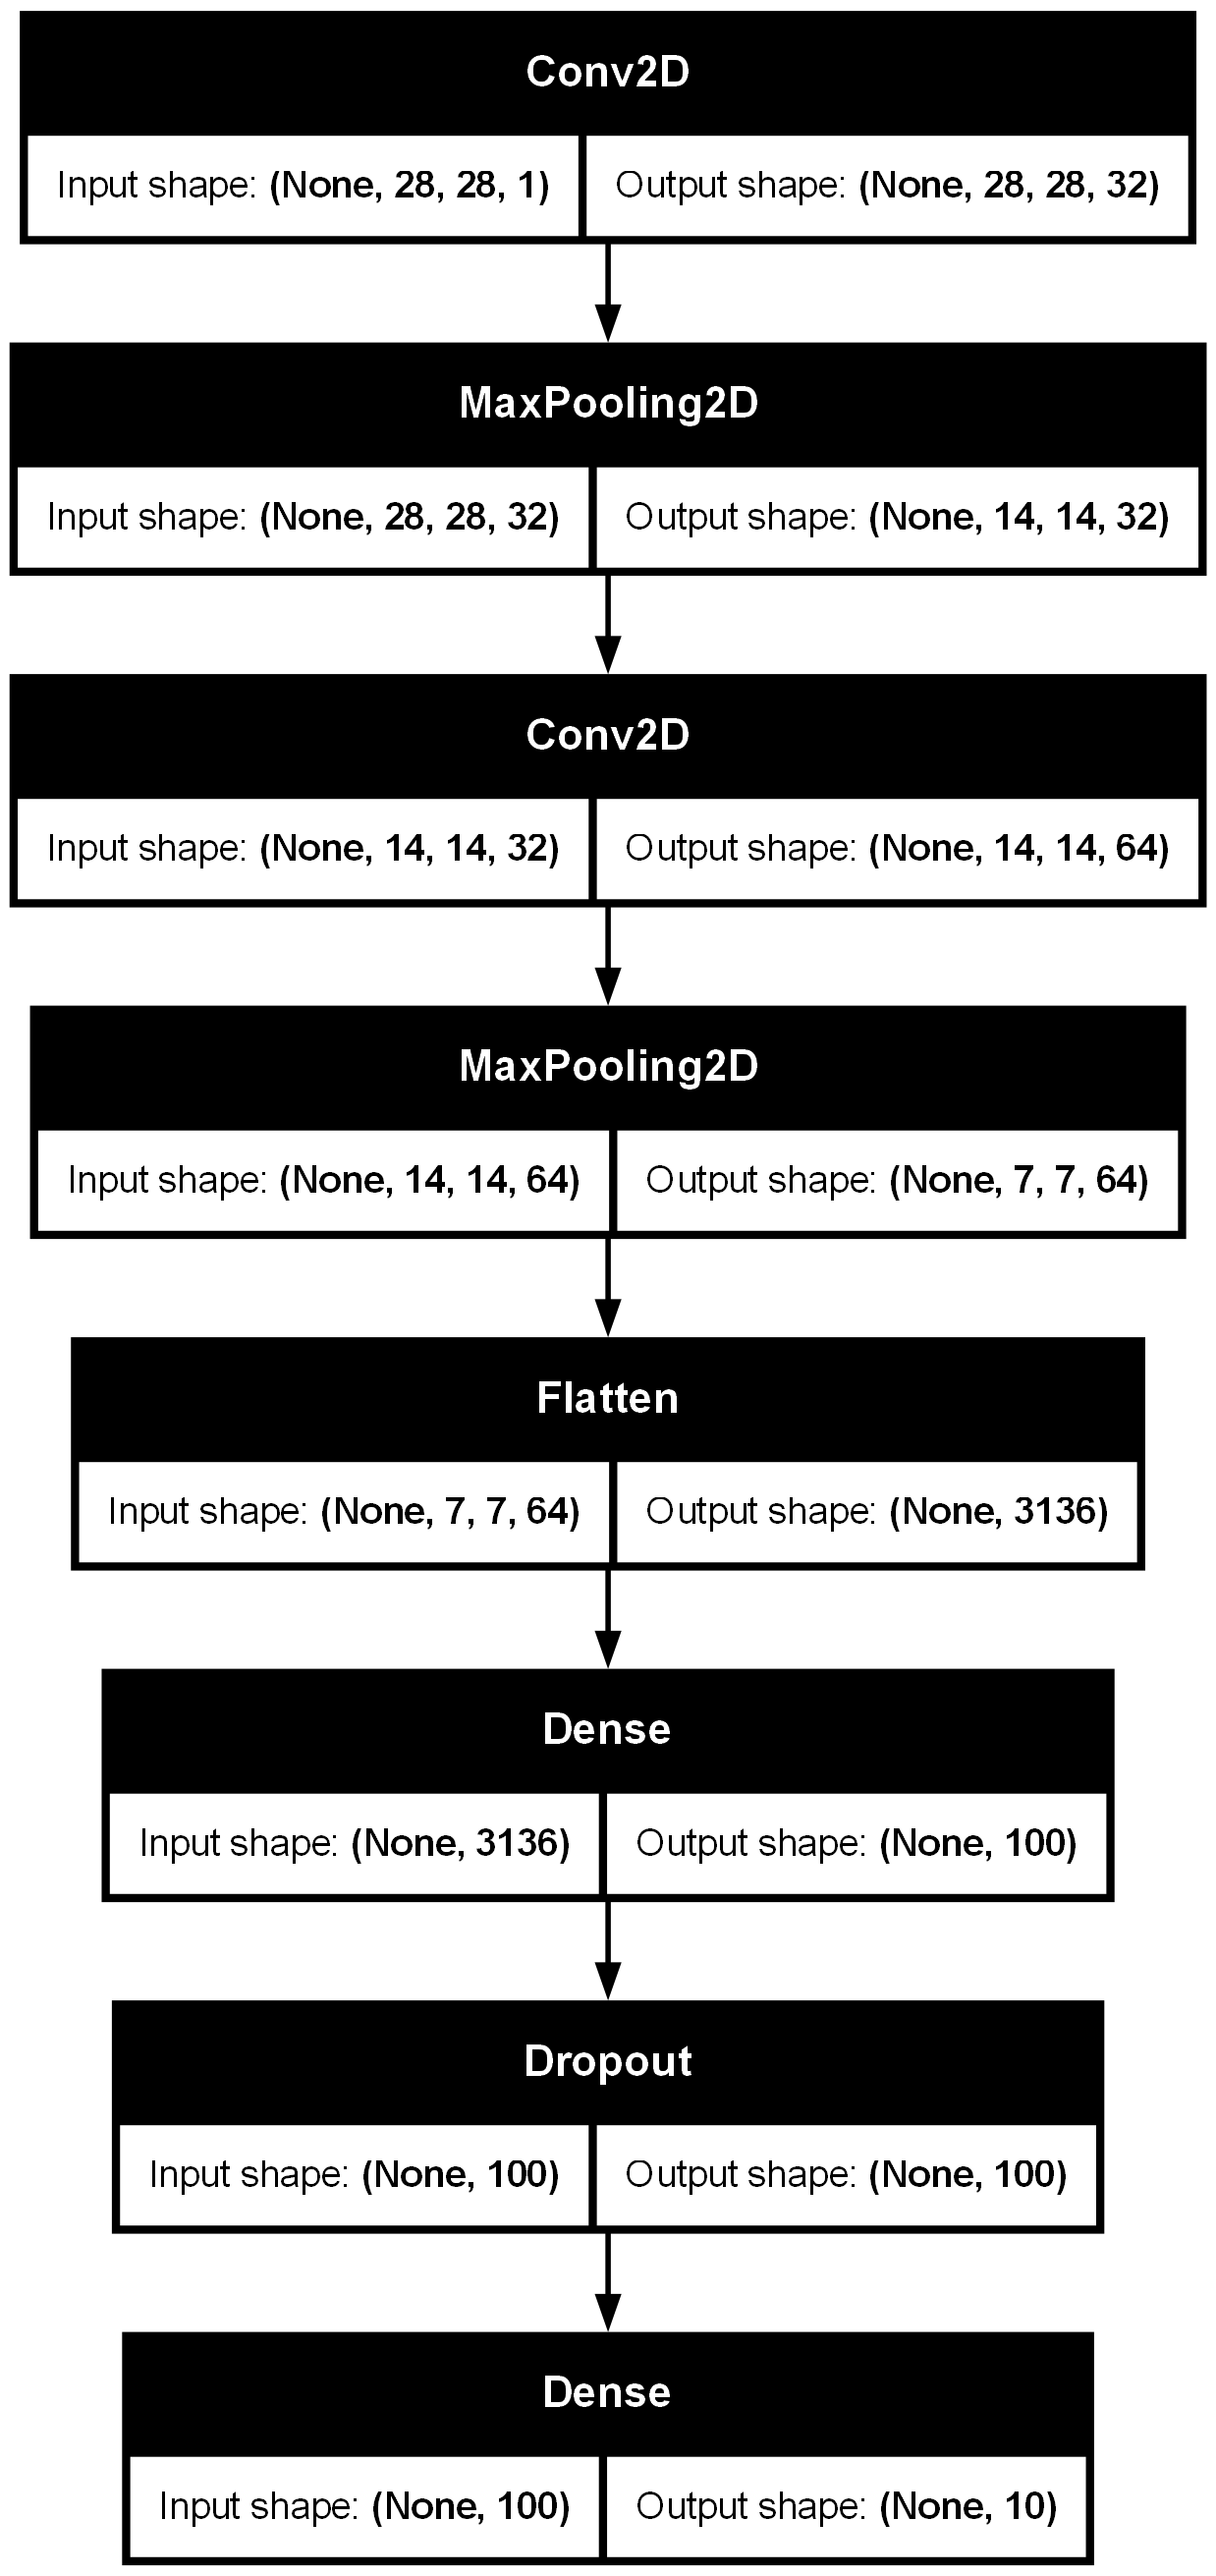

In [ ]:
keras.utils.plot_model(model, show_shapes = True)

In [14]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)
history = model.fit(train_scaled, train_target, epochs = 20, validation_data = (val_scaled, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/20
1496/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7506 - loss: 0.6992

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7509 - loss: 0.6985 - val_accuracy: 0.8807 - val_loss: 0.3204
Epoch 2/20
1495/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8784 - loss: 0.3376

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8784 - loss: 0.3375 - val_accuracy: 0.9046 - val_loss: 0.2582
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8987 - loss: 0.2750

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8987 - loss: 0.2750 - val_accuracy: 0.9108 - val_loss: 0.2412
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9126 - loss: 0.2458 - val_accuracy: 0.9098 - val_loss: 0.2419
Epoch 5/20
1494/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9185 - loss: 0.2189

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9185 - loss: 0.2189 - val_accuracy: 0.9176 - val_loss: 0.2230
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9289 - loss: 0.1946 - val_accuracy: 0.9154 - val_loss: 0.2296
Epoch 7/20
1495/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9342 - loss: 0.1762

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9342 - loss: 0.1762 - val_accuracy: 0.9197 - val_loss: 0.2195
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9389 - loss: 0.1595 - val_accuracy: 0.9204 - val_loss: 0.2265
Epoch 9/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9429 - loss: 0.1493 - val_accuracy: 0.9240 - val_loss: 0.2205


In [17]:
early_stopping_cb.best_epoch

6

In [15]:
import matplotlib.pyplot as plt

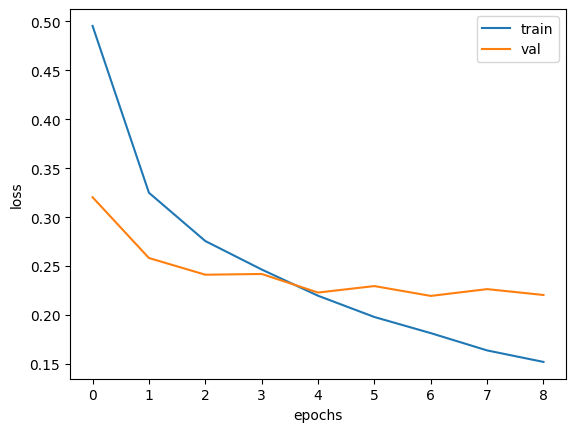

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [18]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9232 - loss: 0.2139


[0.21952266991138458, 0.9196666479110718]

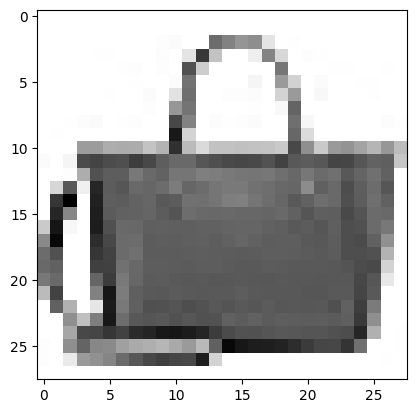

In [19]:
plt.imshow(val_scaled[0].reshape(28,28), cmap = 'gray_r')

In [20]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
[[2.0004341e-13 5.7927983e-21 7.9025421e-15 2.5641682e-17 1.5188906e-15
  1.9605573e-16 1.5432470e-13 1.3774276e-14 1.0000000e+00 2.9620659e-17]]


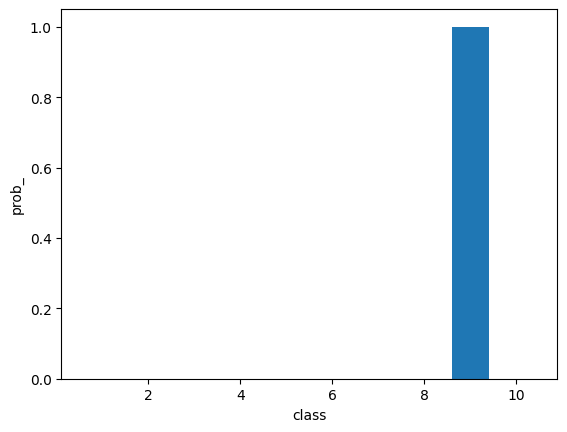

In [21]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob_')
plt.show()

In [22]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [23]:
import numpy as np

In [24]:
print(classes[np.argmax(preds)])

가방


In [25]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [26]:
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9120 - loss: 0.2456


[0.24019214510917664, 0.9121000170707703]